In [2]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [3]:
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png

# Downloading lena.bmp
!wget https://drive.google.com/uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069
!mv uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069 lena.bmp

--2023-06-13 09:14:25--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 173.194.74.139, 173.194.74.100, 173.194.74.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.74.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i0gg2ht9ac1tv2crfsf7vrmm4t1n4sa8/1686647625000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=082254e8-cd9f-481c-a743-f5eba8518440 [following]
--2023-06-13 09:14:25--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i0gg2ht9ac1tv2crfsf7vrmm4t1n4sa8/1686647625000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=082254e8-cd9f-481c-a743-f5eba8518440
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 142.250.103.132, 2607:f8b0:4001:c2b::84
Connecting to doc-0

In [4]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

In [5]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

In [6]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

In [7]:
def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

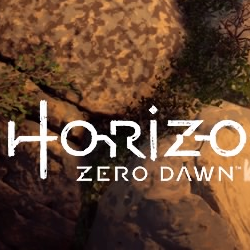

In [8]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img


image = "HorizonZero"
ext = ".png"
key = 20


img = cv2.imread(image + ext)
cv2_imshow(img)

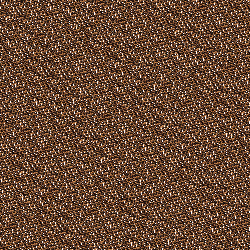

In [9]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

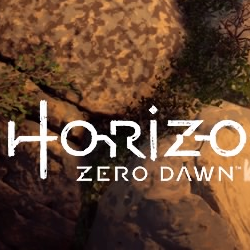

In [10]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

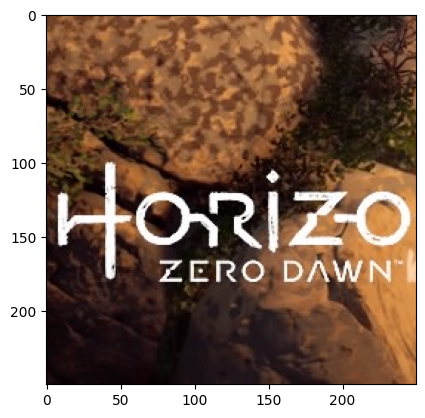

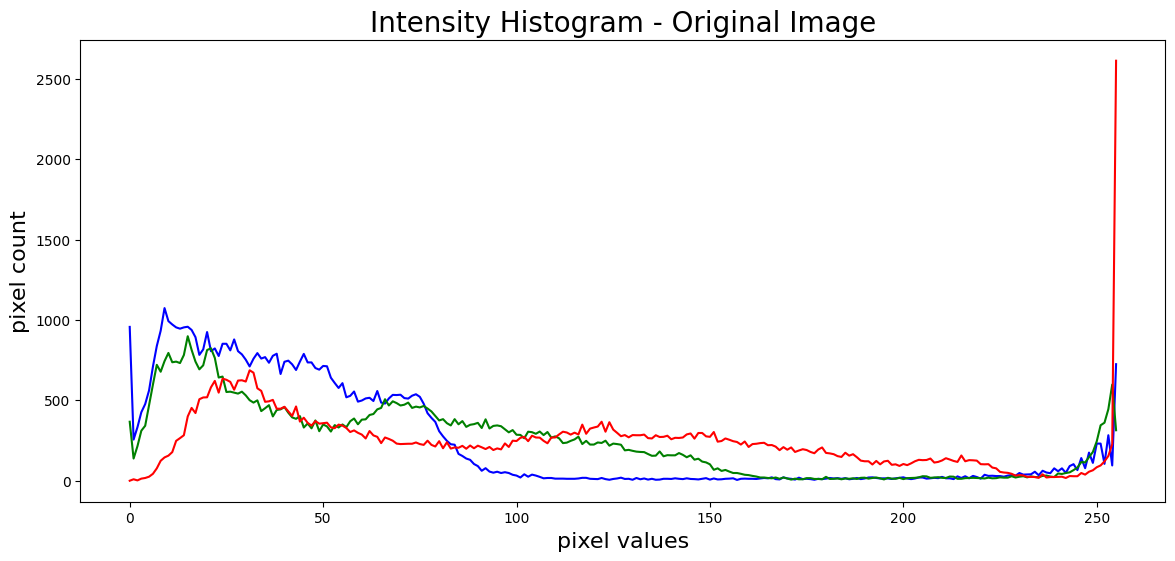

In [11]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()


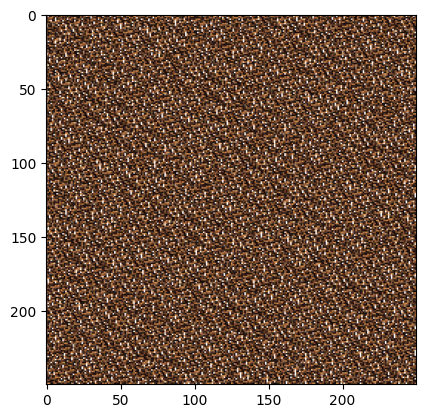

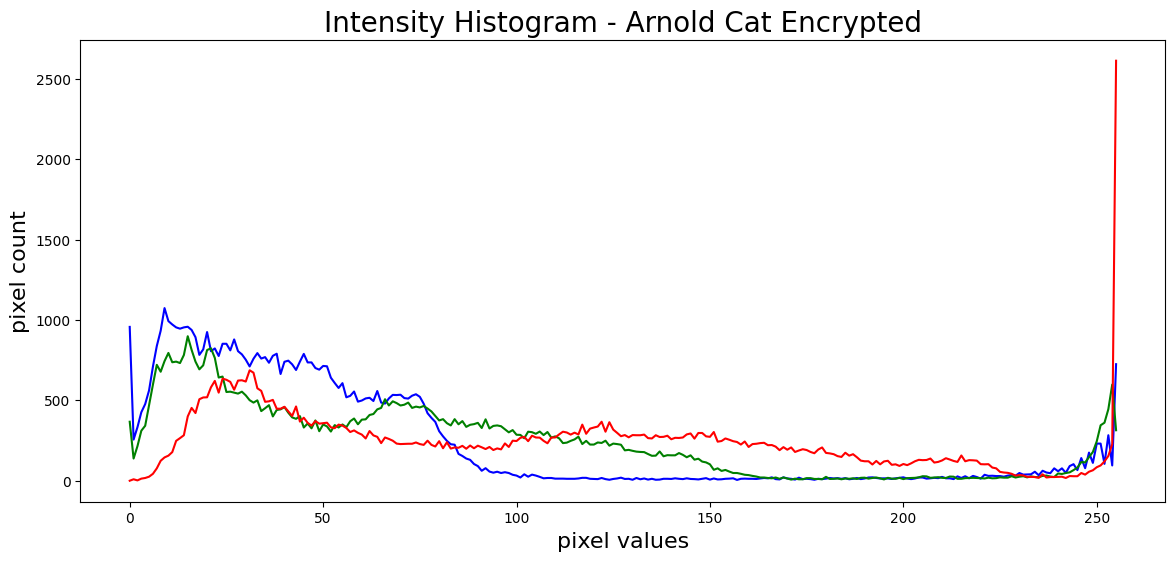

In [12]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

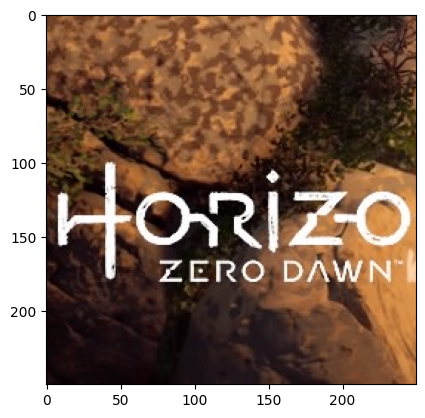

In [13]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))